In [26]:
from qutip import *
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
pi = np.pi

mpl.rcParams['font.size'] = 22
mpl.rcParams['axes.titlesize'] = 22
mpl.rcParams['axes.labelsize'] = 20
mpl.rcParams['xtick.labelsize'] = 18
mpl.rcParams['ytick.labelsize'] = 18
mpl.rcParams['legend.fontsize'] = 17
mpl.rcParams['figure.titlesize'] = 22
mpl.rcParams['lines.linewidth'] = 2

qubit     = '#664277'  # qubit
cavity1   = '#fa476f'  # cavity 1

In [15]:
def ops(*args):
    """
    Returns system operators based on input arguments. The order
    of the input arguments defines the convention of order of the
    elements of the system (for example qubits and cavities).
    
    Input
    -----
    *args : int
        Every argument represents the number of levels of a system element
    
    Returns
    -------
    a# : qutip.Qobj class object
        Lowering operator for element #
    n# : qutip.Qobj class object
        Number operator for element #
    """
    if len(args) == 1:
        a0 = destroy(args[0])
        n0 = a0.dag()*a0
        return a0, n0
    
    elif len(args) == 2:
        a0 = tensor(destroy(args[0]), qeye(args[1]))
        n0 = a0.dag()*a0
        a1 = tensor(qeye(args[0]), destroy(args[1]))
        n1 = a1.dag()*a1
        return a0, a1, n0, n1
    
    elif len(args) == 3:
        a0 = tensor(destroy(args[0]), qeye(args[1]), qeye(args[2]))
        n0 = a0.dag()*a0
        a1 = tensor(qeye(args[0]), destroy(args[1]), qeye(args[2]))
        n1 = a1.dag()*a1
        a2 = tensor(qeye(args[0]), qeye(args[1]), destroy(args[2]))
        n2 = a2.dag()*a2
        return a0, a1, a2, n0, n1, n2
    
    elif len(args) == 4:
        a0 = tensor(destroy(args[0]), qeye(args[1]), qeye(args[2]), qeye(args[3]))
        n0 = a0.dag()*a0
        a1 = tensor(qeye(args[0]), destroy(args[1]), qeye(args[2]), qeye(args[3]))
        n1 = a1.dag()*a1
        a2 = tensor(qeye(args[0]), qeye(args[1]), destroy(args[2]), qeye(args[3]))
        n2 = a2.dag()*a2
        a3 = tensor(qeye(args[0]), qeye(args[1]), qeye(args[2]), destroy(args[3]))
        n3 = a3.dag()*a3
        return a0, a1, a2, a3, n0, n1, n2, n3

In [16]:
Nq = 10         # number of levels in qubit
wq = 6.5 *2*pi  # bare g-e qubit transition frequency
Ec = 0.2 *2*pi  # anharmonicity (charging energy)

In [17]:
b, nq= ops(Nq)
H_Kerr = wq*nq - Ec/2*b.dag()*b.dag()*b*b
H_Duff = (wq+Ec)*nq - Ec/12*(b + b.dag())**4

EE_Kerr = H_Kerr.eigenenergies()
EE_Duff = H_Duff.eigenenergies()

trans_Kerr = np.diff(EE_Kerr)
trans_Duff = np.diff(EE_Duff)

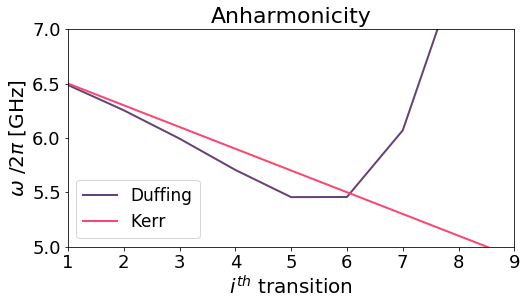

In [29]:
plt.figure(figsize=(8,4))
plt.plot(np.asarray(range(len(trans_Duff)))+1, trans_Duff/2/pi, c=qubit, label="Duffing")
plt.plot(np.asarray(range(len(trans_Kerr)))+1, trans_Kerr/2/pi, c=cavity1, label="Kerr")
plt.xlim([1,9])
plt.ylim([5, 7])
plt.xlabel('$i^{{th}}$ transition')
plt.xticks(range(1,10))
plt.ylabel('$\\omega$ $/2\\pi$ [GHz]')
plt.title("Anharmonicity")
plt.legend(loc='lower left')
plt.show()